# Cocktail Clustering Algorithms

Let's see what the cocktail space looks like under the hood.

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
# importing local files
import sys
sys.path.insert(1, '../bartindr/')
import data_grabbing, constants

In [3]:
import importlib
# importlib.reload(data_grabbing)

In [4]:
# for retreiving cached data
prop_df = pd.read_csv('../bartindr/cached_data/simplified_data.csv')
prop_df = prop_df.rename(columns= {prop_df.columns[0]:'cocktail_name'})
prop_df.index= prop_df[prop_df.columns[0]]
prop_df = prop_df.drop('cocktail_name', axis=1)
prop_df.head()

,absinthe,advocaat,agave syrup,allspice,amaretto,amaro,anise liqueur,aperol,apertif wine,apple,...,tonic,vanilla,vanilla liqueur,vermouth,vodka,water,whiskey,wine,worcestershire sauce,yogurt
cocktail_name,,,,,,,,,,,,,,,,,,,,,
1-900-FUK-MEUP,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110 in the shade,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151 Florida Bushwacker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
155 Belmont,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0
24k nightmare,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
X = prop_df.values

## Affinity Propogation

Affinity propogation works by identifying exemplars to seed clusters. The algorithm identifies the l2 norm distance between any two points. The diagonal of this distance matrix is used to generate cannonical sets, or exemplars. The more items are close to the maximum diagonal, the more exemplars will be treated as cluster classes. Usually this is seeded by finding the diagonals above the median diagonal value.

AP has enormous time complexity $O(N^2i),$
where $N$ is the number of samples and $i$ is the number of iterations required for convergence. Our sample isn't very big, so this isn't a huge concern.

AP is typically used in genomics and computer vision (i.e., *very* rich datasets). This algorithm is almost assuredly doomed to failed given the sparsity of this dataset, but it's worth exploring.

/opt/anaconda3/envs/lbdev/lib/python3.6/site-packages/sklearn/cluster/_affinity_propagation.py:152: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning)


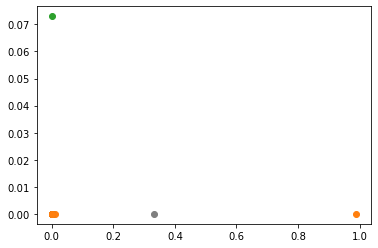

In [6]:
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation
from matplotlib import pyplot


# define the model
#damping factor to minimize iterations
#preference for setting exemplars defaults to median value of input similarities
model = AffinityPropagation(damping=0.9, preference = None) 

# fit the model
model.fit(X)

# assign a cluster to each example
yhat = model.predict(X)
# # retrieve unique clusters
clusters = np.unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(yhat == cluster)
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

So yeah, not a great fit for this dataset.